<a href="https://colab.research.google.com/github/Razzan01/Data-Science-/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAZZAN HARITH MOHAMMED

SCM221-0003/2021



# **PROTEIN LEVEL IN VARIOUS TYPES OF FOODS PER COUNTRY**

# **BUSINESS UNDERSTANDING**

The primary objective is to analyze the protein content in various types of food for different countries which could help to provide insights that can inform product development, marketing strategies, and nutritional recommendations.

This analysis aims to identify trends and patterns in protein content across different food categories in each country.

# **DATA UNDERSTANDING**

**DATA LOADING**

In [1]:
#Importing Libraries
import pandas as pd
#Load the data into a DataFrame
df = pd.read_csv('/content/protein.txt' , delimiter="\t")
print(df)

           Country  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0          Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1          Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2          Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3         Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4   Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   
5          Denmark     10.6       10.8   3.7  25.0   9.9     21.9     4.8   
6        E Germany      8.4       11.6   3.7  11.1   5.4     24.6     6.5   
7          Finland      9.5        4.9   2.7  33.7   5.8     26.3     5.1   
8           France     18.0        9.9   3.3  19.5   5.7     28.1     4.8   
9           Greece     10.2        3.0   2.8  17.6   5.9     41.7     2.2   
10         Hungary      5.3       12.4   2.9   9.7   0.3     40.1     4.0   
11         Ireland     13.9       10.0   4.7  25.8   2.2     24.0     6.2   

The dataset comprises of different countries,types of foods that is; red meat,white meat,fish,eggs,cereals,starch,nuts,fruits & veg.It shows the level of protein that is contained in each type of food.

In [2]:
from tabulate import tabulate

#getting column names
column_names = df.columns.tolist()

#convert column names to a list for tabulation
column_names_table = [[i+1, name] for i, name in enumerate(column_names)]

# Print column names as a table
print(tabulate(column_names_table, headers=["Index", "Column Name"]))

  Index  Column Name
-------  -------------
      1  Country
      2  RedMeat
      3  WhiteMeat
      4  Eggs
      5  Milk
      6  Fish
      7  Cereals
      8  Starch
      9  Nuts
     10  Fr&Veg


The columns are stated.

In [3]:
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


This shows the first five rows of the dataset

In [4]:
df.tail()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
20,Switzerland,13.1,10.1,3.1,23.8,2.3,25.6,2.8,2.4,4.9
21,UK,17.4,5.7,4.7,20.6,4.3,24.3,4.7,3.4,3.3
22,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9
23,W Germany,11.4,12.5,4.1,18.8,3.4,18.6,5.2,1.5,3.8
24,Yugoslavia,4.4,5.0,1.2,9.5,0.6,55.9,3.0,5.7,3.2


This shows the last five rows of the dataset

In [5]:
#Shape
print(df.shape)

(25, 10)


The dataset contains 25 rows and 10 columns

In [6]:
# Summary of the DataFrame
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    25 non-null     object 
 1   RedMeat    25 non-null     float64
 2   WhiteMeat  25 non-null     float64
 3   Eggs       25 non-null     float64
 4   Milk       25 non-null     float64
 5   Fish       25 non-null     float64
 6   Cereals    25 non-null     float64
 7   Starch     25 non-null     float64
 8   Nuts       25 non-null     float64
 9   Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


This gives all the information about the dataset such as the columns in the dataset,the data types that is; float and object, and also the data capacity.

In [7]:
# Identify missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Country      0
RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr&Veg       0
dtype: int64


There are no missing values in the dataset

In [8]:
# Identify duplicated values
print("\nDuplicates values in each column:")
print(df.duplicated().sum())


Duplicates values in each column:
0


There are no duplicated values in the dataset

In [9]:
# Define a function to detect outliers using the IQR method
def detect_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

# Iterate through each column in the DataFrame and check for outliers
for column in df.columns:
    outliers = detect_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n{outliers}\n")
    else:
        print(f"No outliers detected in column '{column}'\n")

No outliers detected in column 'Country'

Outliers detected in column 'RedMeat':
8     18.0
21    17.4
Name: RedMeat, dtype: float64

No outliers detected in column 'WhiteMeat'

Outliers detected in column 'Eggs':
0     0.5
16    1.1
24    1.2
Name: Eggs, dtype: float64

No outliers detected in column 'Milk'

Outliers detected in column 'Fish':
16    14.2
Name: Fish, dtype: float64

No outliers detected in column 'Cereals'

No outliers detected in column 'Starch'

No outliers detected in column 'Nuts'

No outliers detected in column 'Fr&Veg'



It shows that there are outliers in the dataset.

Outliers indicate various things in the dataset.It could indicate variability in the dataset, errors in data collection measurement or entry, presence of subpopulation in the data , influential observations etc.

In [10]:
# Basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


The data reveals the summary statitistics of the data that is:
the count,
the mean which is the average value of the dataset,the standard deviation which is  The square root of the variance. It gives a measure of the average distance of the data points from the mean,
minimum and maximum value of the dataset,
25th percentile that is the lower quartile,
50th percentile that is the median.It is middle value when the data is ordered and 75th percentile that is the upper quartile.

In [11]:
# Basic statistics for categorical columns
print("\nBasic statistics for categorical columns:")
df.describe(include=['O'])


Basic statistics for categorical columns:


,Country
count,25
unique,25
top,Albania
freq,1


This gives the summary statistics of categorical data

**DATA CLEANING**

In [12]:
#Removing outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from the specified column
df_no_outliers = remove_outliers_iqr(df,column)
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Data shape after removing outliers: (25, 10)


I was not able to remove outliers the shape of the dataset remained the same even after removing them

# **E.D.A**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

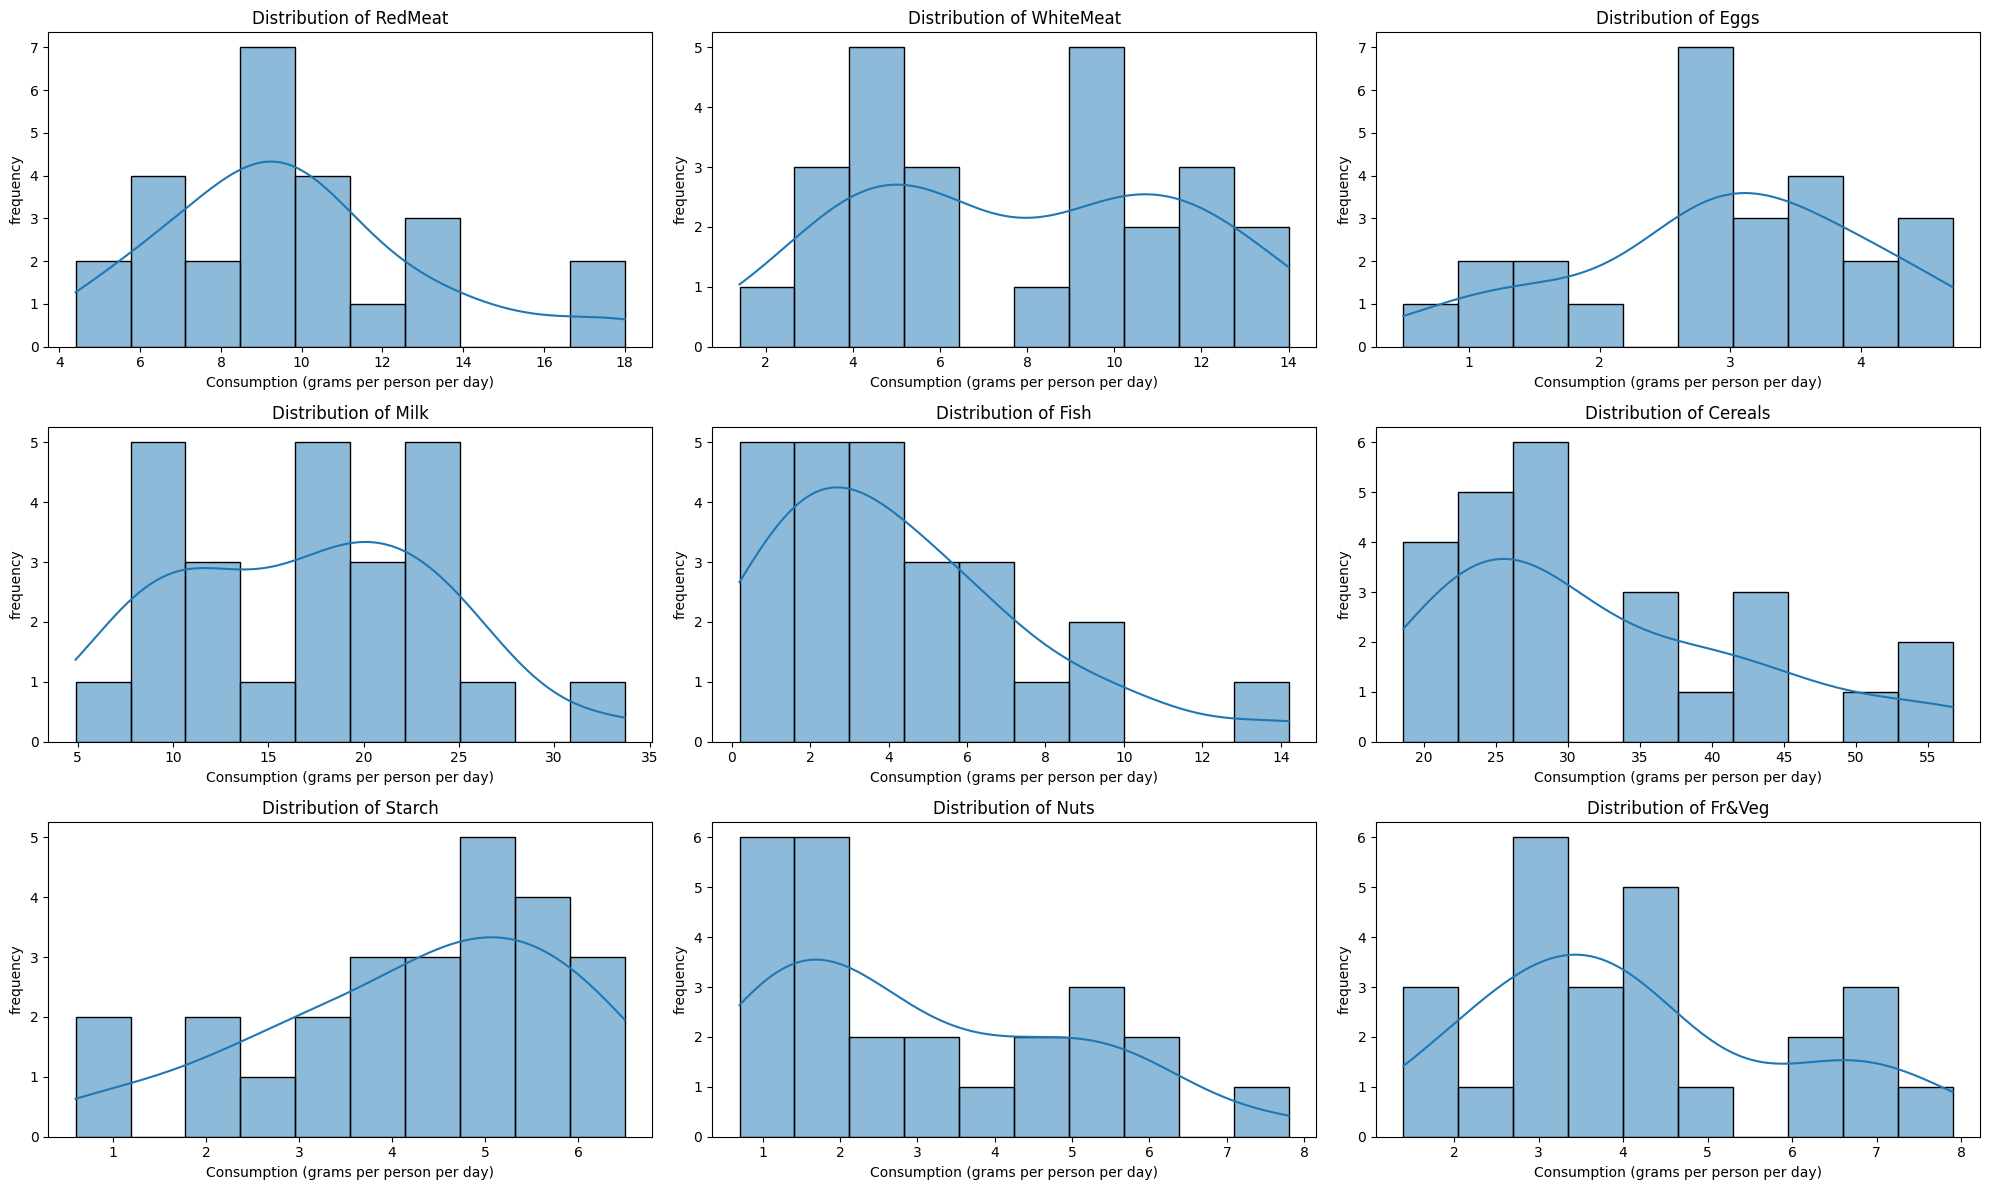

In [14]:
# Melt the dataset to long format for easy plotting
melted_data = df.melt(id_vars=['Country'], var_name='Food Category', value_name='Consumption')

# Plotting histograms for each category
categories = melted_data['Food Category'].unique()
plt.figure(figsize=(20, 12))

for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for 9 categories
    sns.histplot(melted_data[melted_data['Food Category'] == category]['Consumption'], bins=10, kde=True)
    plt.title(f'Distribution of {category}')
    plt.xlabel('Consumption (grams per person per day)')
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()

The distribution of the level of protein consumed in each food type per day is shown.

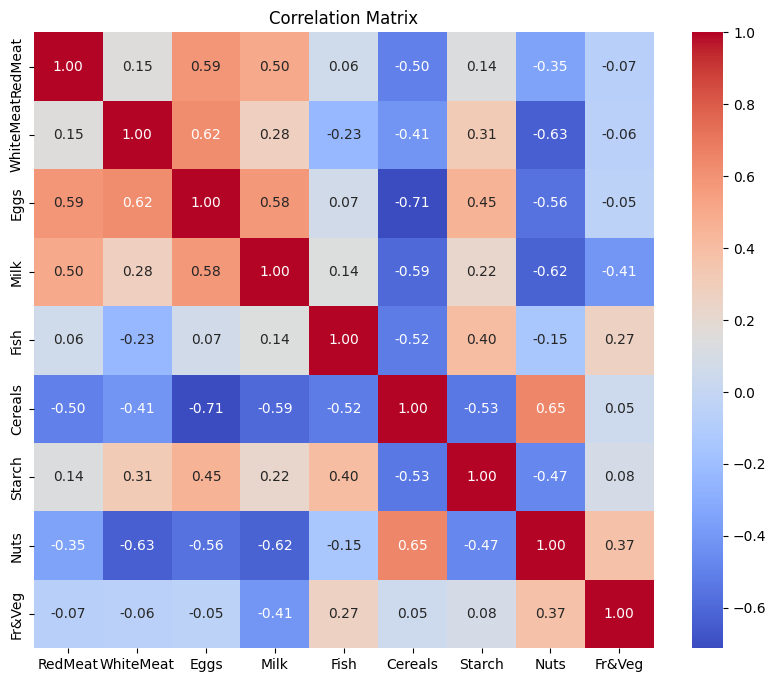

In [15]:
# Exclude the non-numeric 'Country' column for correlation calculation
numeric_data = df.drop(columns=['Country'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

This is the correlation matrix of the dataset which shows correlation coefficients between various variables such as nuts and milk etc.

Correlation matrix could be used to:
indicate positive or negative relationship between  variables eg there is a positive relationship between nuts and cereals,
detect multicollinearity eg nuts and cereals are slightly high correlated etc

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming 'pa' is the DataFrame holding your dataset
numeric_data = df.drop(columns=['Country'])

# Add a constant term for the intercept
X = sm.add_constant(numeric_data)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF
print(vif_data)

     Feature         VIF
0      const  239.153503
1    RedMeat    2.112466
2  WhiteMeat    4.193091
3       Eggs    4.512637
4       Milk    2.614434
5       Fish    3.400301
6    Cereals    5.319095
7     Starch    1.852658
8       Nuts    4.448313
9     Fr&Veg    1.944365


This shows the VIF of the dataset.

Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in a set of multiple regression variables. Multicollinearity occurs when predictor variables in a regression model are highly correlated, which can cause problems in estimating the coefficients and interpreting the model.

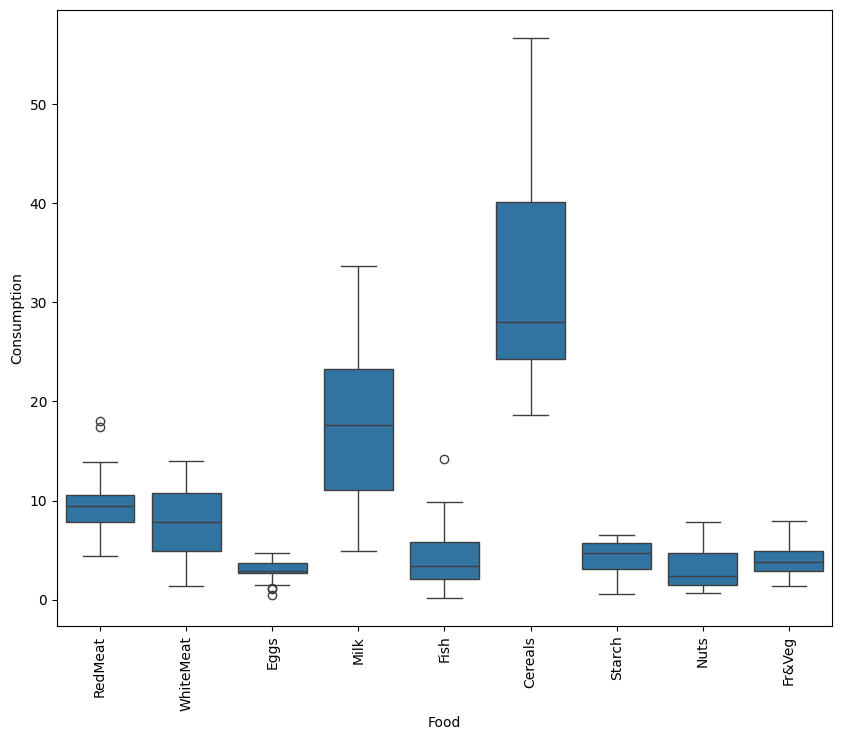

In [17]:
data_melted = df.melt(id_vars='Country', var_name='Food', value_name='Consumption')
plt.figure(figsize=(10, 8))
sns.boxplot(x='Food', y='Consumption', data=data_melted)
plt.xticks(rotation=90)
plt.show()

# **REGRESSION MODELLING**

In [24]:
#Finding the total protein intake per Country
df['Total_df'] = df[['RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals', 'Starch', 'Nuts', 'Fr&Veg']].sum(axis=1)

# Display the updated DataFrame
print(df.head())

          Country  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0         Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1         Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2         Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3        Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4  Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   

   Nuts  Fr&Veg  Total_df  
0   5.5     1.7      71.2  
1   1.3     4.3      86.4  
2   2.1     4.0      87.3  
3   3.7     4.2      90.6  
4   1.1     4.0      82.8  


This is to enble us to model the data well

In [25]:
numeric_columns =df.columns[1:]
df[numeric_columns] =df[numeric_columns].astype(float)
df[numeric_columns]

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Total_df
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,71.2
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,86.4
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,87.3
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,90.6
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,82.8
5,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,89.8
6,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,75.7
7,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,90.4
8,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,98.2
9,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,97.7


<ipython-input-49-1c7e5478131a>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  protein.fit(X_train, y_train)


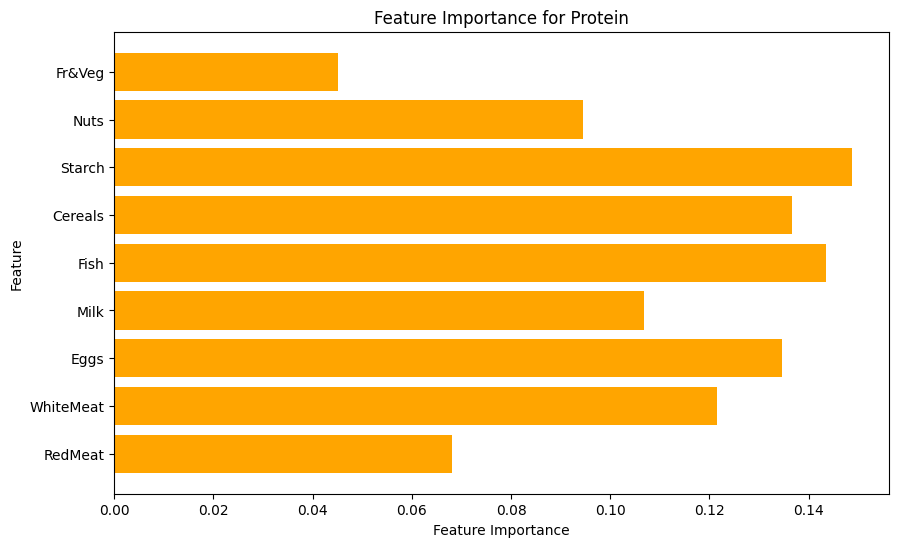

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Select relevant features and target
features = ['RedMeat', 'WhiteMeat', 'Eggs', 'Milk','Fish','Cereals','Starch','Nuts','Fr&Veg']
target   = ['Total_df']

# Define features and target variable
X = df[features]
y = df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
protein = RandomForestRegressor(n_estimators=100, random_state=42)
protein.fit(X_train, y_train)

# Calculate feature importances
feature_importances = protein.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='orange')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Protein')
plt.show()

In [27]:
y_prediction=protein.predict(X_test)
y_prediction

array([86.889, 84.885, 89.997, 86.326, 87.715])

In [33]:
y_train_pred = protein.predict(X_train)
y_train_pred

array([92.101, 84.89 , 85.961, 89.131, 87.547, 87.191, 86.144, 90.275,
       89.328, 85.329, 87.425, 87.918, 87.313, 82.033, 88.063, 88.401,
       85.05 , 83.589, 81.997, 78.725])

In [60]:
print(X_train)

    RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  Nuts  Fr&Veg
9      10.2        3.0   2.8  17.6   5.9     41.7     2.2   7.8     6.5
13      9.5       13.6   3.6  23.4   2.5     22.4     4.2   1.8     3.7
1       8.9       14.0   4.3  19.9   2.1     28.0     3.6   1.3     4.3
22      9.3        4.6   2.1  16.6   3.0     43.6     6.4   3.4     2.9
5      10.6       10.8   3.7  25.0   9.9     21.9     4.8   0.7     2.4
2      13.5        9.3   4.1  17.5   4.5     26.6     5.7   2.1     4.0
12      9.0        5.1   2.9  13.7   3.4     36.8     2.1   4.3     6.7
15      6.9       10.2   2.7  19.3   3.0     36.1     5.9   2.0     6.6
3       7.8        6.0   1.6   8.3   1.2     56.7     1.1   3.7     4.2
4       9.7       11.4   2.8  12.5   2.0     34.3     5.0   1.1     4.0
20     13.1       10.1   3.1  23.8   2.3     25.6     2.8   2.4     4.9
17      6.2        6.3   1.5  11.1   1.0     49.6     3.1   5.3     2.8
21     17.4        5.7   4.7  20.6   4.3     24.3     4.7   3.4 

In [61]:
print(X_test)

    RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  Nuts  Fr&Veg
8      18.0        9.9   3.3  19.5   5.7     28.1     4.8   2.4     6.5
16      6.2        3.7   1.1   4.9  14.2     27.0     5.9   4.7     7.9
0      10.1        1.4   0.5   8.9   0.2     42.3     0.6   5.5     1.7
23     11.4       12.5   4.1  18.8   3.4     18.6     5.2   1.5     3.8
11     13.9       10.0   4.7  25.8   2.2     24.0     6.2   1.6     2.9


In [52]:
from sklearn.linear_model import LinearRegression
mymodel=LinearRegression()
model=mymodel.fit(X_train,y_train)
model

LinearRegression()

Fitting a multiple linear regression Y=β0 ​+ β1​X1 ​+ β2​X2 ​+…+ βn​Xn ​+ ϵ

Where:

Y is the dependent variable (the variable we are trying to predict). X1 , X2,…,XnX1 ​, X2​,…, Xn​ are the independent variables (predictor variables). β0​ is the intercept (the value of Y when all independent variables are zero). β1 , β2,…, βnβ1 ​, β2​,…, βn​ are the coefficients (the parameters that represent the relationship between each independent variable and the dependent variable). ϵ is the error term (the difference between the observed value and the predicted value of Y).

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error", mae)

Mean Squared Error: 125.93881119999928
R-squared: -0.24065912189585337
Mean Absolute Error <function mean_absolute_error at 0x7e888af8fac0>


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# 1. Initialize the model:
model = LinearRegression()

# 2. Perform k-fold cross-validation:
ff = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(model, X, y, cv=ff, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X, y, cv=ff, scoring='r2')

# 3. Calculate and print the average scores:
avg_mse = -cv_scores_mse.mean()
avg_r2 = cv_scores_r2.mean()

print("Average Mean Squared Error (Cross-Validation):", avg_mse)
print("Average R-squared (Cross-Validation):", avg_r2)

Average Mean Squared Error (Cross-Validation): 6.058451752097371e-28
Average R-squared (Cross-Validation): 1.0


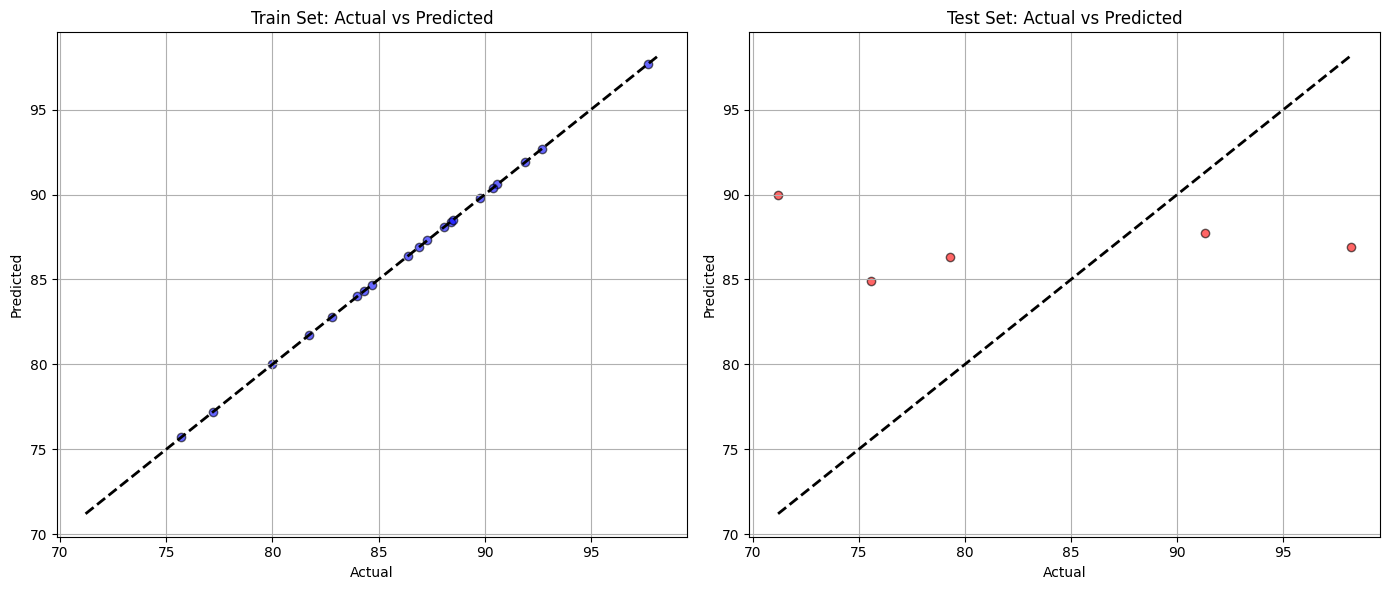

In [83]:
# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot for train set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Set: Actual vs Predicted')
plt.grid(True)

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='red', edgecolor='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [75]:
model.intercept_

array([5.68434189e-14])

In [76]:
model.coef_

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [77]:
y_prediction=model.predict(X_train)
y_prediction

array([[97.7],
       [84.7],
       [86.4],
       [91.9],
       [89.8],
       [87.3],
       [84. ],
       [92.7],
       [90.6],
       [82.8],
       [88.1],
       [86.9],
       [88.4],
       [77.2],
       [88.5],
       [90.4],
       [84.3],
       [81.7],
       [80. ],
       [75.7]])

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
r2_score(y_train,y_prediction)

1.0

In [79]:
mean_squared_error(y_train,y_prediction)

1.211690350419474e-28

In [80]:
mean_absolute_error(y_train,y_prediction)

8.526512829121202e-15

# **DISCUSSION**

The model contains positive coefficients as shown above this indicates that there is a direct relationship between dependent and predictor variables since coefficients indicate change in dependent variable for a one unit change in the predictor.

The model is a best fit since we have an r-squared of 1.R-squared shows the proportion of variance in dependent variable explained by the predictors.

The mean squared error of the model is 125 while the mean squared error through cross validation is 6.This indicates a better predictive accuracy since cross validation describes how well the model performs on unseen data.




# **CONCLUSION**

The regression model exhibits excellent performance in terms of accuracy and generalization, as evidenced by both the learning curves and the actual vs. predicted plot. The model effectively balances bias and variance, making it a reliable predictor for this dataset.